In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('traffic_data.csv')
df.head()

,hour,vehicle_count
0,0,20
1,1,15
2,2,10
3,3,8
4,4,12


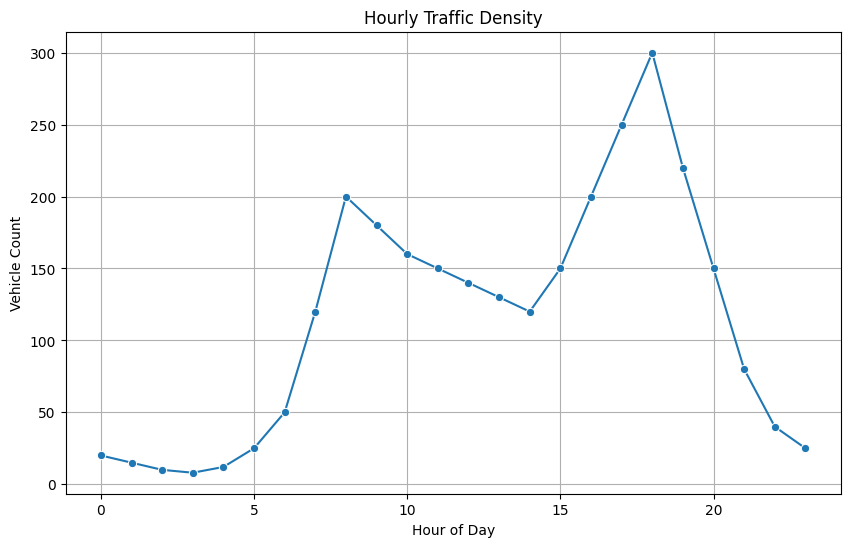

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='hour', y='vehicle_count', marker='o')
plt.title('Hourly Traffic Density')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.grid(True)
plt.show()

In [4]:
peak_hour = df.loc[df['vehicle_count'].idxmax()]
print(f"Peak traffic hour: {peak_hour['hour']} with {peak_hour['vehicle_count']} vehicles")

low_hour = df.loc[df['vehicle_count'].idxmin()]
print(f"Lowest traffic hour: {low_hour['hour']} with {low_hour['vehicle_count']} vehicles")

Peak traffic hour: 18 with 300 vehicles
Lowest traffic hour: 3 with 8 vehicles


In [5]:
mean = df['vehicle_count'].mean()
std = df['vehicle_count'].std()

threshold = mean + 1.5 * std
anomalies = df[df['vehicle_count'] > threshold]

print("Traffic anomalies (possible unusual spikes):\n", anomalies)

Traffic anomalies (possible unusual spikes):
     hour  vehicle_count
17    17            250
18    18            300


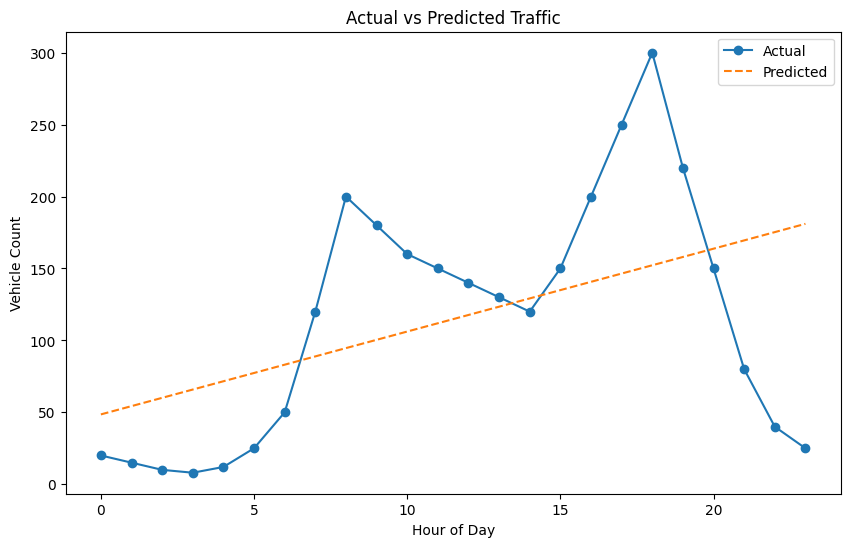

In [6]:
X = df[['hour']]
y = df['vehicle_count']

model = LinearRegression()
model.fit(X, y)

# Predict for every hour
df['predicted'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(df['hour'], df['vehicle_count'], label='Actual', marker='o')
plt.plot(df['hour'], df['predicted'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Vehicle Count')
plt.legend()
plt.show()
